In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("dubai_properties.csv")
df.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

deleting unwanted null values

In [3]:
df=df[df["Latitude"].notna()]

there was the latitude and longitude having null values so we have to delete them

### Why we are supposed to delete ?
as they seems to higly correlated with the City and Location

## What does the data set tells us

#### **Address**:It tells you the exact address and it was specified in the features Location and city
#### **Rent**:It tells you how much rent does a person supposed to pay it seems like a multiple of Area_in_sqft and Rent_per_sqft
#### **Beds**:number of beds
#### **baths**:nmber of bath rooms
#### **Area_in_sqft**:Area measured in square foot
#### **Rent_per_sqft**:rent per square foot it can be depend on city ,type of the property
#### **Rent_category**:it defines the rent category 
#### **Frequency**:this denotes how frequently the rent will be paid
#### **Purpose**:what is the purpose of the property whether it is for rent or sale
#### **Posted_date**:when the data was posted 
#### **Age_of_listing_in_days**:what is the age of listing
#### **Location**:what is teh location of the property expecting to to be might be in hundreds
#### **City**:At what city the property situated at it might be in tens of numbers 
#### **Latitude**:latitiude of proerty
#### **Longitude**:Longitude of property

In [4]:
for cols in df.columns:
    print(cols, ":",len(df[cols].unique()))

Address : 4389
Rent : 2094
Beds : 13
Baths : 11
Type : 9
Area_in_sqft : 4943
Rent_per_sqft : 31159
Rent_category : 3
Frequency : 1
Furnishing : 2
Purpose : 1
Posted_date : 538
Age_of_listing_in_days : 538
Location : 359
City : 8
Latitude : 412
Longitude : 412


In [5]:
df.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


In [6]:
df.tail()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
73729,"Al Salamah, Umm Al Quwain",10000,0,1,Apartment,249,40.160643,Low,Yearly,Unfurnished,For Rent,2023-12-09,134,Al Salamah,Umm Al Quwain,25.493412,55.575994
73734,"Al Ramlah, Umm Al Quwain",25000,1,1,Villa,500,50.000000,Low,Yearly,Unfurnished,For Rent,2023-12-01,142,Al Ramlah,Umm Al Quwain,25.511461,55.578804
73735,"Umm Al Quwain Marina, Umm Al Quwain",22000,2,2,Apartment,1000,22.000000,Low,Yearly,Unfurnished,For Rent,2024-03-26,26,Umm Al Quwain Marina,Umm Al Quwain,25.527959,55.606527
73737,"Al Huboob 1, Al Salamah, Umm Al Quwain",14000,0,1,Apartment,419,33.412888,Low,Yearly,Unfurnished,For Rent,2023-12-14,129,Al Salamah,Umm Al Quwain,25.493412,55.575994
73738,"Umm Al Quwain Marina, Umm Al Quwain",14000,0,1,Apartment,500,28.000000,Low,Yearly,Unfurnished,For Rent,2023-12-14,129,Umm Al Quwain Marina,Umm Al Quwain,25.527959,55.606527


# According to domain knowledge what are the feature can be dropped
### **Address**=beause the location and city is specified also it has more unique values 
### **Rent**=It was amultiple of Area_in_sqft and Rent_per_sqft
### **Rent_category**=it was indirectly depend on Area_in_sqft and Rent_per_sqft
### **Frequency**=It has only one unique value it might wont make a significant change in model
### **Purpose**=It has only one unique value it might wont make a significant change in model 






In [7]:
df=df.drop(columns=["Address","Rent","Rent_category","Frequency","Purpose"],axis=1)
df.head()

,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Furnishing,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,3,4,Apartment,1785,69.467787,Unfurnished,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,3,4,Apartment,1422,98.452883,Unfurnished,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,2,3,Apartment,1314,75.342466,Furnished,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,3,4,Penthouse,3843,57.246942,Unfurnished,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,5,7,Villa,6860,51.020408,Unfurnished,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


In [8]:
df.isnull().sum()

Beds                      0
Baths                     0
Type                      0
Area_in_sqft              0
Rent_per_sqft             0
Furnishing                0
Posted_date               0
Age_of_listing_in_days    0
Location                  0
City                      0
Latitude                  0
Longitude                 0
dtype: int64

In [9]:
df["Posted_year"]=df["Posted_date"].str.split("-").str[0]

df=df.drop(columns=["Posted_date"])

No null values fount in the dataset

Dividing df into categorical and numerical features

In [10]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']


## Univariate analysis

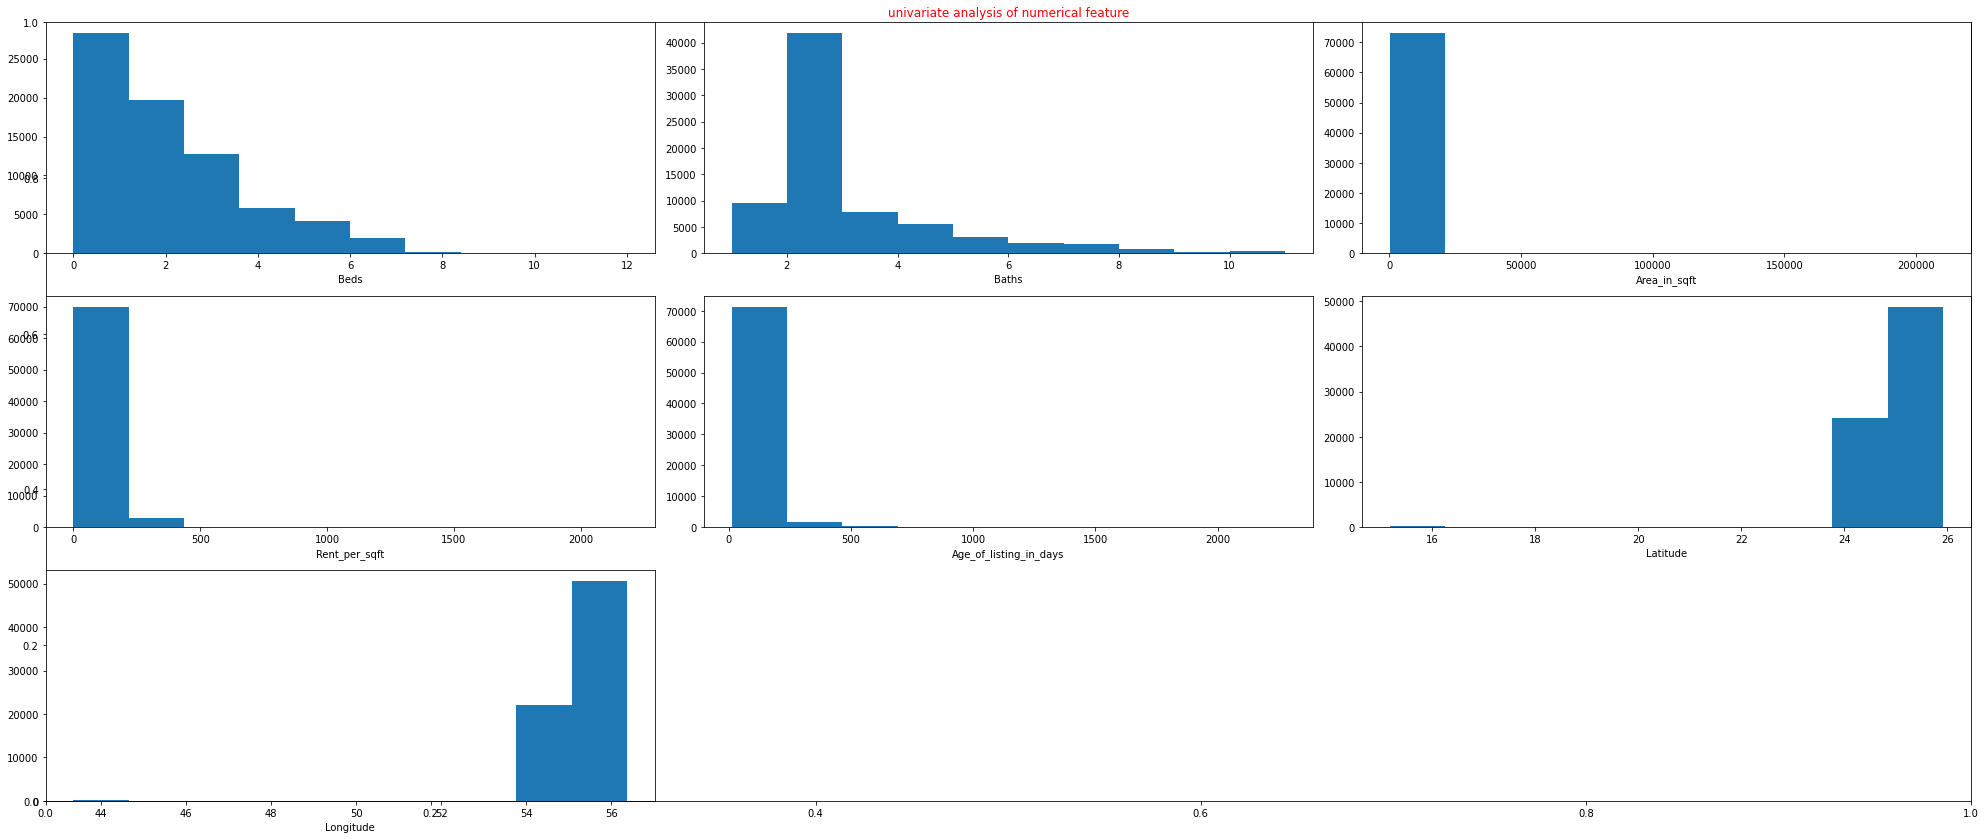

In [11]:
def univarate_analysis(feature,feature_list_name,rows,columns):
    plt.figure(figsize=(28, 12))
    title="univariate analysis of "+feature_list_name
    plt.title(title,color="r")
    for i in range(0,len(feature)):
        plt.subplot(rows, columns, i+1)
        plt.hist(df[feature[i]])
        plt.xlabel(feature[i])

    plt.tight_layout()
    plt.show()
univarate_analysis(numerical_features,"numerical feature",rows=3,columns=3)


## **REPORT**

#### Every numerical feature is right skewed seems like outliers are present exceopt latitude and longitude
=======================================================================================================================================================================================

univarate_analysis of categorical values


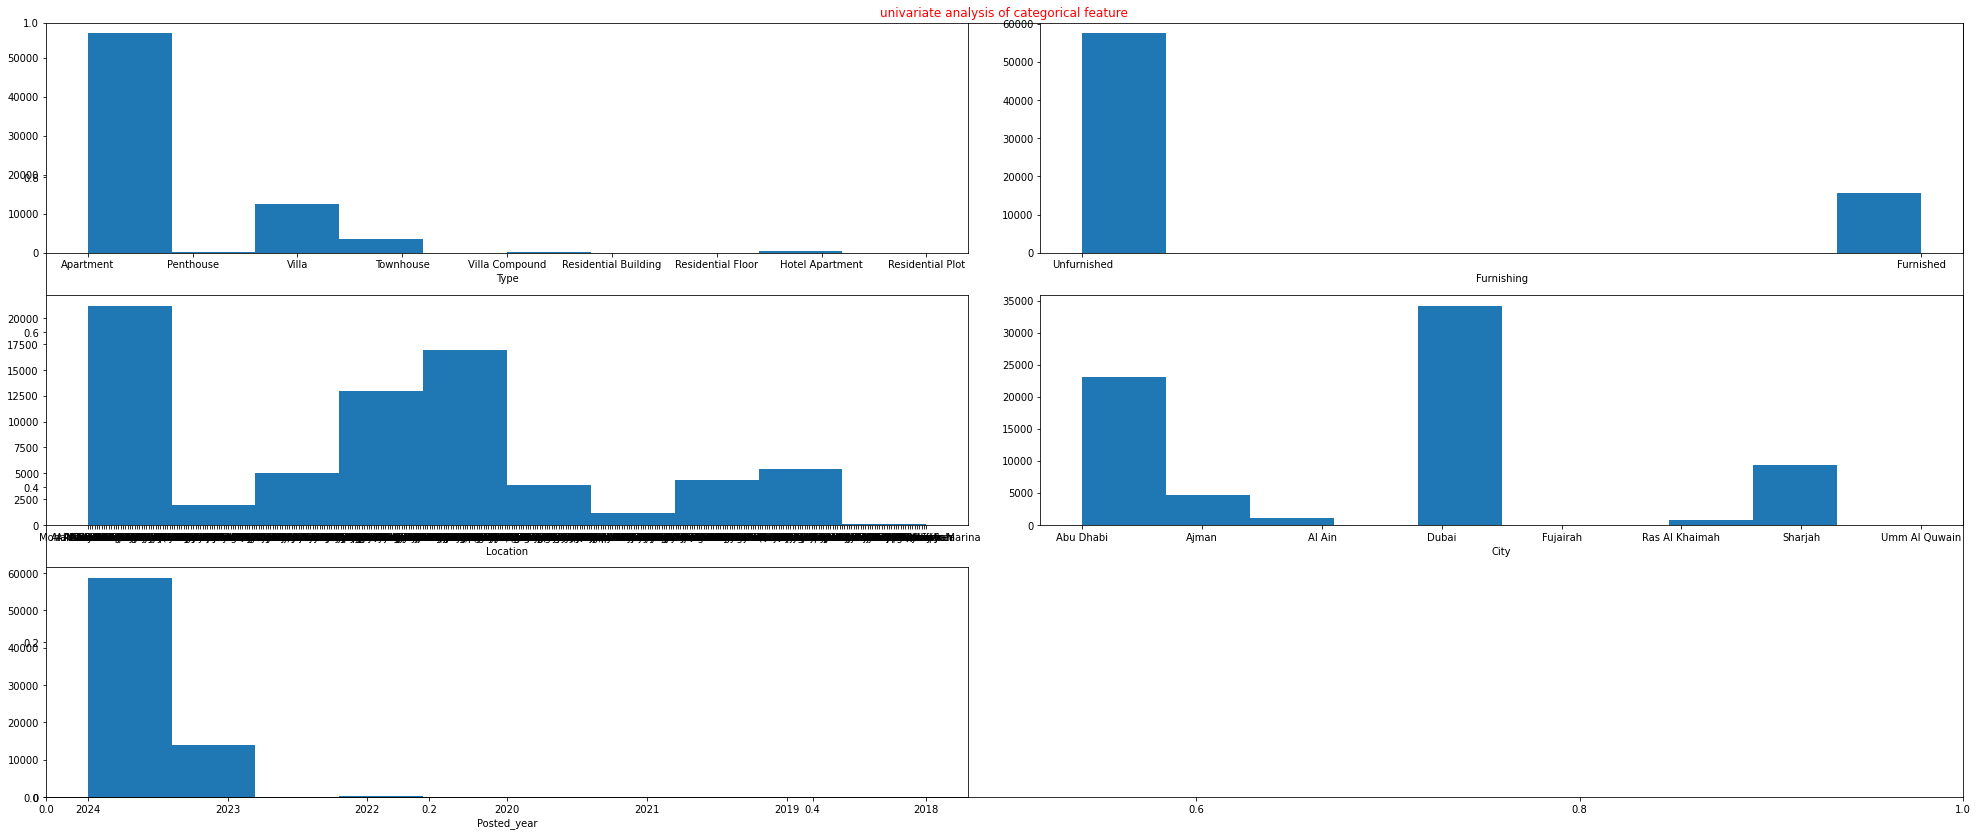

In [12]:
univarate_analysis(categorical_features,"categorical feature",rows=3,columns=2)


## **REPORT**

#### Location has too many features so better to delete it
=======================================================================================================================================================================================

In [13]:
df=df.drop(columns=["Location"],axis=1)
df.head()


,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Furnishing,Age_of_listing_in_days,City,Latitude,Longitude,Posted_year
0,3,4,Apartment,1785,69.467787,Unfurnished,45,Abu Dhabi,24.493598,54.407841,2024
1,3,4,Apartment,1422,98.452883,Unfurnished,44,Abu Dhabi,24.494022,54.607372,2024
2,2,3,Apartment,1314,75.342466,Furnished,31,Abu Dhabi,24.485931,54.600939,2024
3,3,4,Penthouse,3843,57.246942,Unfurnished,57,Abu Dhabi,24.493598,54.407841,2024
4,5,7,Villa,6860,51.020408,Unfurnished,65,Abu Dhabi,24.494022,54.607372,2024


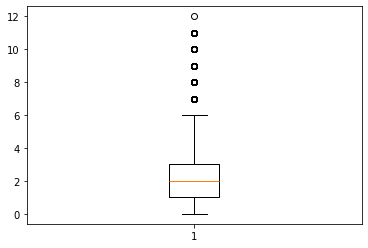

,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Furnishing,Age_of_listing_in_days,City,Latitude,Longitude,Posted_year
0,3,4,Apartment,1785,69.467787,Unfurnished,45,Abu Dhabi,24.493598,54.407841,2024
1,3,4,Apartment,1422,98.452883,Unfurnished,44,Abu Dhabi,24.494022,54.607372,2024
2,2,3,Apartment,1314,75.342466,Furnished,31,Abu Dhabi,24.485931,54.600939,2024
3,3,4,Penthouse,3843,57.246942,Unfurnished,57,Abu Dhabi,24.493598,54.407841,2024
4,5,7,Villa,6860,51.020408,Unfurnished,65,Abu Dhabi,24.494022,54.607372,2024


In [14]:
plt.boxplot(df.Beds)
plt.show()
df.head()

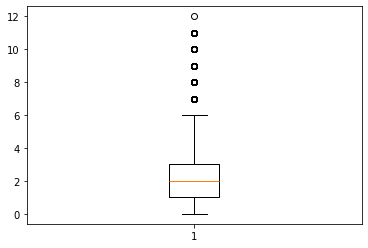

,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Furnishing,Age_of_listing_in_days,City,Latitude,Longitude,Posted_year
0,3,4,Apartment,1785,69.467787,Unfurnished,45,Abu Dhabi,24.493598,54.407841,2024
1,3,4,Apartment,1422,98.452883,Unfurnished,44,Abu Dhabi,24.494022,54.607372,2024
2,2,3,Apartment,1314,75.342466,Furnished,31,Abu Dhabi,24.485931,54.600939,2024
3,3,4,Penthouse,3843,57.246942,Unfurnished,57,Abu Dhabi,24.493598,54.407841,2024
4,5,7,Villa,6860,51.020408,Unfurnished,65,Abu Dhabi,24.494022,54.607372,2024


In [15]:
plt.boxplot(df.Beds)
plt.show()
df.head()

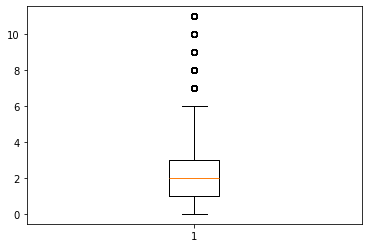

In [16]:
df1=df[df["Beds"]==12].index
df=df.drop(df1)
plt.boxplot(df.Beds)
plt.show()

### Do i actually consider outliers?
think no because planning to work with random forest regressor,decision tree,xgboost

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73022 entries, 0 to 73738
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Beds                    73022 non-null  int64  
 1   Baths                   73022 non-null  int64  
 2   Type                    73022 non-null  object 
 3   Area_in_sqft            73022 non-null  int64  
 4   Rent_per_sqft           73022 non-null  float64
 5   Furnishing              73022 non-null  object 
 6   Age_of_listing_in_days  73022 non-null  int64  
 7   City                    73022 non-null  object 
 8   Latitude                73022 non-null  float64
 9   Longitude               73022 non-null  float64
 10  Posted_year             73022 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 6.7+ MB


seems like the posted_year was object convert it to int

In [18]:
df["Posted_year"]=df["Posted_year"].astype('int')

In [19]:
df.corr()

,Beds,Baths,Area_in_sqft,Rent_per_sqft,Age_of_listing_in_days,Latitude,Longitude,Posted_year
Beds,1.000000,0.749040,0.601409,-0.172304,0.051609,-0.122280,-0.074438,-0.046540
Baths,0.749040,1.000000,0.465544,-0.244007,0.054166,-0.213817,-0.165780,-0.057758
Area_in_sqft,0.601409,0.465544,1.000000,-0.160669,0.018076,-0.067490,-0.042340,-0.016669
Rent_per_sqft,-0.172304,-0.244007,-0.160669,1.000000,-0.052052,0.160283,0.084509,0.051468
Age_of_listing_in_days,0.051609,0.054166,0.018076,-0.052052,1.000000,-0.074574,-0.054673,-0.823904
Latitude,-0.122280,-0.213817,-0.067490,0.160283,-0.074574,1.000000,0.916877,0.074788
Longitude,-0.074438,-0.165780,-0.042340,0.084509,-0.054673,0.916877,1.000000,0.057131
Posted_year,-0.046540,-0.057758,-0.016669,0.051468,-0.823904,0.074788,0.057131,1.000000


## **Report**
 #### Age of listing in higly correlated with posted_year so we can delete the age of listing   

In [20]:
df=df.drop(columns=['Age_of_listing_in_days'],axis=1)
df.head()

,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Furnishing,City,Latitude,Longitude,Posted_year
0,3,4,Apartment,1785,69.467787,Unfurnished,Abu Dhabi,24.493598,54.407841,2024
1,3,4,Apartment,1422,98.452883,Unfurnished,Abu Dhabi,24.494022,54.607372,2024
2,2,3,Apartment,1314,75.342466,Furnished,Abu Dhabi,24.485931,54.600939,2024
3,3,4,Penthouse,3843,57.246942,Unfurnished,Abu Dhabi,24.493598,54.407841,2024
4,5,7,Villa,6860,51.020408,Unfurnished,Abu Dhabi,24.494022,54.607372,2024


### let me encode the categoricalvalues to numericals and check the correlation

In [21]:
df.Type.unique()

array(['Apartment', 'Penthouse', 'Villa', 'Townhouse', 'Villa Compound',
       'Residential Building', 'Residential Floor', 'Hotel Apartment',
       'Residential Plot'], dtype=object)

In [22]:
df.City.unique()

array(['Abu Dhabi', 'Ajman', 'Al Ain', 'Dubai', 'Fujairah',
       'Ras Al Khaimah', 'Sharjah', 'Umm Al Quwain'], dtype=object)

I think label encoding(nominal encoding) works well than frequency/ordinal encoding because we are not dealing with any of the ranking categories

we can rank the city having highest median rent and lowest median rent

In [23]:

def ranking_mech(column,tcolumn,df):
    mydict={}
    dm={}
    for value in df[column].unique():
        df1=df[df[column]==value]
        odict={value:df1[tcolumn].median()}
        mydict.update(odict)
    sorted_dict = dict(sorted(mydict.items(), key=lambda item: item[1], reverse=False))
    property_list=list(sorted_dict.keys())

    for i in range(0,len(property_list)):
        odm={property_list[i]:i+1}
        dm.update(odm)

    df[column]=df[column].replace(dm)
ranking_mech("City","Rent_per_sqft",df)



Now i'm going to encode the furnishing column 

In [24]:
ranking_mech("Furnishing","Rent_per_sqft",df)

Now i'm going to encode the Type column 

In [25]:
ranking_mech("Type","Rent_per_sqft",df)

In [26]:
df.head()

,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Furnishing,City,Latitude,Longitude,Posted_year
0,3,4,5,1785,69.467787,1,7,24.493598,54.407841,2024
1,3,4,5,1422,98.452883,1,7,24.494022,54.607372,2024
2,2,3,5,1314,75.342466,2,7,24.485931,54.600939,2024
3,3,4,6,3843,57.246942,1,7,24.493598,54.407841,2024
4,5,7,3,6860,51.020408,1,7,24.494022,54.607372,2024


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73022 entries, 0 to 73738
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Beds           73022 non-null  int64  
 1   Baths          73022 non-null  int64  
 2   Type           73022 non-null  int64  
 3   Area_in_sqft   73022 non-null  int64  
 4   Rent_per_sqft  73022 non-null  float64
 5   Furnishing     73022 non-null  int64  
 6   City           73022 non-null  int64  
 7   Latitude       73022 non-null  float64
 8   Longitude      73022 non-null  float64
 9   Posted_year    73022 non-null  int32  
dtypes: float64(3), int32(1), int64(6)
memory usage: 5.8 MB


In [29]:
df.corr()

,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Furnishing,City,Latitude,Longitude,Posted_year
Beds,1.000000,0.749040,-0.652367,0.601409,-0.172304,-0.192057,-0.094459,-0.122280,-0.074438,-0.046540
Baths,0.749040,1.000000,-0.519530,0.465544,-0.244007,-0.175367,-0.221008,-0.213817,-0.165780,-0.057758
Type,-0.652367,-0.519530,1.000000,-0.470294,0.241709,0.219862,0.078099,0.111381,0.056371,-0.000155
Area_in_sqft,0.601409,0.465544,-0.470294,1.000000,-0.160669,-0.110900,-0.044215,-0.067490,-0.042340,-0.016669
Rent_per_sqft,-0.172304,-0.244007,0.241709,-0.160669,1.000000,0.491532,0.526603,0.160283,0.084509,0.051468
Furnishing,-0.192057,-0.175367,0.219862,-0.110900,0.491532,1.000000,0.297834,0.132679,0.083451,0.042772
City,-0.094459,-0.221008,0.078099,-0.044215,0.526603,0.297834,1.000000,-0.056721,-0.124354,0.056004
Latitude,-0.122280,-0.213817,0.111381,-0.067490,0.160283,0.132679,-0.056721,1.000000,0.916877,0.074788
Longitude,-0.074438,-0.165780,0.056371,-0.042340,0.084509,0.083451,-0.124354,0.916877,1.000000,0.057131
Posted_year,-0.046540,-0.057758,-0.000155,-0.016669,0.051468,0.042772,0.056004,0.074788,0.057131,1.000000


posted year wont make any corr

In [30]:
df=df.drop(columns=["Posted_year"])
#df.to_csv("final_data.csv")
df.head()

,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Furnishing,City,Latitude,Longitude
0,3,4,5,1785,69.467787,1,7,24.493598,54.407841
1,3,4,5,1422,98.452883,1,7,24.494022,54.607372
2,2,3,5,1314,75.342466,2,7,24.485931,54.600939
3,3,4,6,3843,57.246942,1,7,24.493598,54.407841
4,5,7,3,6860,51.020408,1,7,24.494022,54.607372
